In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
import statsmodels.formula.api as smf


In [3]:
data=pd.read_csv("claims.csv")

In [4]:
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [5]:
data.claim_date

0       11/27/2017
1       10/03/2018
2       02/02/2018
3       06/17/2018
4       01/13/2018
           ...    
1095    06/11/2017
1096    03/14/2018
1097    02/09/2018
1098    03/21/2018
1099    06/04/2017
Name: claim_date, Length: 1100, dtype: object

In [6]:
data['claim_amount']=data['claim_amount'].str.replace('$','').astype('float')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10096\3873732607.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['claim_amount']=data['claim_amount'].str.replace('$','').astype('float')


In [7]:
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   float64
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 86.1+ KB


In [9]:
data.claim_amount.min()

1000.0

In [10]:
data.claim_amount.max()

48150.5

In [11]:
data_binned=pd.Series(pd.cut(data.claim_amount,range(0,50000,10000)))

In [12]:
data_binned

0           (0, 10000]
1           (0, 10000]
2           (0, 10000]
3           (0, 10000]
4           (0, 10000]
             ...      
1095        (0, 10000]
1096        (0, 10000]
1097    (20000, 30000]
1098    (20000, 30000]
1099    (30000, 40000]
Name: claim_amount, Length: 1100, dtype: category
Categories (4, interval[int64, right]): [(0, 10000] < (10000, 20000] < (20000, 30000] < (30000, 40000]]

In [13]:
data['data_binned']=data_binned

In [14]:
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,data_binned
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]"
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]"
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]"
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]"
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]"


In [15]:
data_1=data.copy()

In [16]:
data_1['data_group']=np.where(data_1.claim_amount<=10000,"Very Low",
                             np.where(data_1.claim_amount<=20000,"Low",
                                     np.where(data_1.claim_amount<=30000,"Medium",
                                             np.where(data_1.claim_amount<=40000,"High","Very high"))))

In [17]:
data_1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,data_binned,data_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]",Very Low
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]",Very Low
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]",Very Low
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]",Very Low
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]",Very Low


In [18]:
data.total_policy_claims.min()

1.0

In [19]:
data.total_policy_claims.max()

8.0

In [20]:
data_1['total_policy_group']=np.where(data_1.total_policy_claims<=3,'Low',
                                     np.where(data_1.total_policy_claims<=6,"Medium","High"))

In [21]:
data_1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,data_binned,data_group,total_policy_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]",Very Low,Low
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]",Very Low,Low
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]",Very Low,Low
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]",Very Low,Low
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]",Very Low,Low


In [22]:
data_1=data_1.drop(columns=['total_policy_claims','claim_amount'])

In [23]:
data_1=data_1.drop(columns=['data_binned'])

In [24]:
data_1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,fraudulent,data_group,total_policy_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,No,Very Low,Low
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,No,Very Low,Low
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,Yes,Very Low,Low
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,No,Very Low,Low
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,No,Very Low,Low


In [25]:
data_1=data_1.drop(columns=['claim_date'])

In [26]:
data_1=data_1.drop(columns=['claim_id','customer_id'])

In [27]:
data_1.head()

,incident_cause,claim_area,police_report,claim_type,fraudulent,data_group,total_policy_group
0,Driver error,Auto,No,Material only,No,Very Low,Low
1,Crime,Home,Unknown,Material only,No,Very Low,Low
2,Other driver error,Auto,No,Material only,Yes,Very Low,Low
3,Natural causes,Auto,No,Material only,No,Very Low,Low
4,Crime,Auto,No,Material only,No,Very Low,Low


In [28]:
data['fraudulent']=np.where(data['fraudulent']=='No',0,1)

In [29]:
data_1['fraudulent']=np.where(data_1['fraudulent']=='No',0,1)

In [30]:
data_1.head()

,incident_cause,claim_area,police_report,claim_type,fraudulent,data_group,total_policy_group
0,Driver error,Auto,No,Material only,0,Very Low,Low
1,Crime,Home,Unknown,Material only,0,Very Low,Low
2,Other driver error,Auto,No,Material only,1,Very Low,Low
3,Natural causes,Auto,No,Material only,0,Very Low,Low
4,Crime,Auto,No,Material only,0,Very Low,Low


In [31]:
data.isna().sum()

claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount            65
total_policy_claims     10
fraudulent               0
data_binned            100
dtype: int64

In [32]:
data_1.isna().sum()

incident_cause        0
claim_area            0
police_report         0
claim_type            0
fraudulent            0
data_group            0
total_policy_group    0
dtype: int64

<AxesSubplot:>

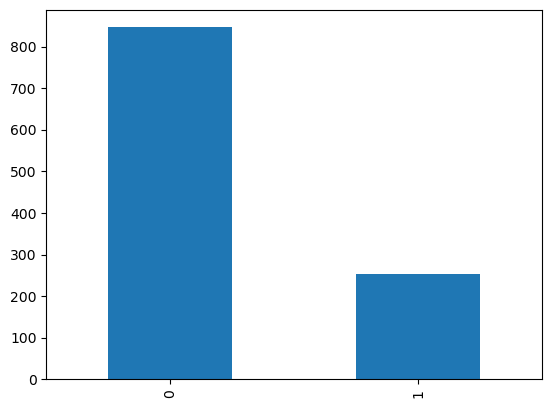

In [33]:
data_1.fraudulent.value_counts().plot(kind='bar')

In [34]:
data_1.head(10)

,incident_cause,claim_area,police_report,claim_type,fraudulent,data_group,total_policy_group
0,Driver error,Auto,No,Material only,0,Very Low,Low
1,Crime,Home,Unknown,Material only,0,Very Low,Low
2,Other driver error,Auto,No,Material only,1,Very Low,Low
3,Natural causes,Auto,No,Material only,0,Very Low,Low
4,Crime,Auto,No,Material only,0,Very Low,Low
5,Other driver error,Auto,No,Injury only,1,High,Low
6,Driver error,Auto,No,Material only,0,Very Low,Medium
7,Natural causes,Auto,No,Material only,0,Very Low,Low
8,Crime,Auto,Unknown,Material only,0,Very Low,Low
9,Crime,Auto,No,Material only,1,Very Low,Low


# One hot encoding 

## converting the variables into numerical columns

In [35]:
data_1.columns

Index(['incident_cause', 'claim_area', 'police_report', 'claim_type',
       'fraudulent', 'data_group', 'total_policy_group'],
      dtype='object')

In [36]:
data_1=pd.get_dummies(data_1,columns=['incident_cause', 'claim_area', 'police_report', 'claim_type', 'data_group', 'total_policy_group'],dtype=int)

In [37]:
data_1.head(10)

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,...,claim_type_Material and injury,claim_type_Material only,data_group_High,data_group_Low,data_group_Medium,data_group_Very Low,data_group_Very high,total_policy_group_High,total_policy_group_Low,total_policy_group_Medium
0,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5,1,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
6,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
7,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
8,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
9,1,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [38]:
data_1.shape

(1100, 22)

In [39]:
data.shape

(1100, 11)

In [40]:
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,data_binned
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,0,"(0, 10000]"
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,0,"(0, 10000]"
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,1,"(0, 10000]"
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,0,"(0, 10000]"
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,0,"(0, 10000]"


In [41]:
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,data_binned
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,0,"(0, 10000]"
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,0,"(0, 10000]"
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,1,"(0, 10000]"
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,0,"(0, 10000]"
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,0,"(0, 10000]"


In [42]:
data_1['claim_amount']=data['claim_amount']
data_1['total_policy_claims']=data['total_policy_claims']

In [43]:
data_1.head(10)

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,...,data_group_High,data_group_Low,data_group_Medium,data_group_Very Low,data_group_Very high,total_policy_group_High,total_policy_group_Low,total_policy_group_Medium,claim_amount,total_policy_claims
0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2980.0,1.0
1,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,2980.0,3.0
2,1,0,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,3369.5,1.0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1680.0,1.0
4,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2680.0,1.0
5,1,0,0,0,0,1,1,0,1,0,...,1,0,0,0,0,0,1,0,38306.5,3.0
6,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,1730.0,4.0
7,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1160.0,3.0
8,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,2620.0,1.0
9,1,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2748.5,2.0


In [44]:
data_1.isna().sum()

fraudulent                            0
incident_cause_Crime                  0
incident_cause_Driver error           0
incident_cause_Natural causes         0
incident_cause_Other causes           0
incident_cause_Other driver error     0
claim_area_Auto                       0
claim_area_Home                       0
police_report_No                      0
police_report_Unknown                 0
police_report_Yes                     0
claim_type_Injury only                0
claim_type_Material and injury        0
claim_type_Material only              0
data_group_High                       0
data_group_Low                        0
data_group_Medium                     0
data_group_Very Low                   0
data_group_Very high                  0
total_policy_group_High               0
total_policy_group_Low                0
total_policy_group_Medium             0
claim_amount                         65
total_policy_claims                  10
dtype: int64

# we are getting some missing values in the claim_amount and total_policy_claims 
so we will just impute them with their respective medians

In [45]:
data_1.total_policy_claims.value_counts()

1.0    793
2.0    107
3.0     89
4.0     61
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [46]:
data_1.total_policy_claims.median()

1.0

In [47]:
data_1.total_policy_claims.mode()

0    1.0
Name: total_policy_claims, dtype: float64

In [48]:
data_1['claim_amount']=data_1['claim_amount'].fillna(data_1['claim_amount'].median())
data_1['total_policy_claims']=data_1['total_policy_claims'].fillna(data_1['total_policy_claims'].median())

In [49]:
data_1.head()

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,...,data_group_High,data_group_Low,data_group_Medium,data_group_Very Low,data_group_Very high,total_policy_group_High,total_policy_group_Low,total_policy_group_Medium,claim_amount,total_policy_claims
0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2980.0,1.0
1,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,2980.0,3.0
2,1,0,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,3369.5,1.0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1680.0,1.0
4,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2680.0,1.0


In [50]:
#We are just doing some manipulation to check if the accuracy can be increased.
#We will try to convert the dataset into the standardized format

In [51]:
data_1.head()

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,...,data_group_High,data_group_Low,data_group_Medium,data_group_Very Low,data_group_Very high,total_policy_group_High,total_policy_group_Low,total_policy_group_Medium,claim_amount,total_policy_claims
0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2980.0,1.0
1,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,2980.0,3.0
2,1,0,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,3369.5,1.0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1680.0,1.0
4,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2680.0,1.0


# outlier treatment

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='claim_amount'>

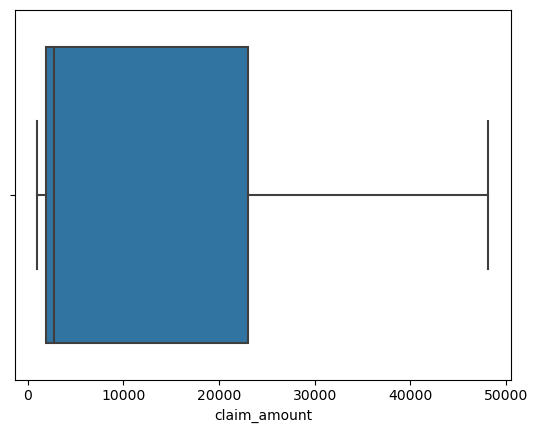

In [52]:
sns.boxplot(data_1.claim_amount)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_policy_claims'>

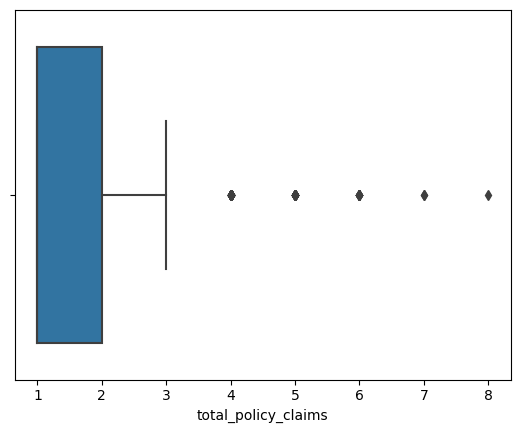

In [53]:
sns.boxplot(data_1.total_policy_claims)

In [54]:
data_3=data_1.copy()

In [55]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [56]:
data_3.apply(outliertreat_IQR)

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,...,data_group_High,data_group_Low,data_group_Medium,data_group_Very Low,data_group_Very high,total_policy_group_High,total_policy_group_Low,total_policy_group_Medium,claim_amount,total_policy_claims
0,0.0,0.0,0.0,0.0,-1.5,0.0,1.0,0.0,-1.5,-1.5,...,0.0,0.0,0.0,-1.5,0.0,0.0,1.0,0.0,-29711.25,-0.5
1,0.0,0.0,0.0,0.0,2.5,0.0,1.0,0.0,2.5,2.5,...,0.0,0.0,0.0,2.5,0.0,0.0,1.0,0.0,54686.75,3.5


In [57]:
data_3['total_policy_claims']=data_3['total_policy_claims'].clip(lower=-0.5,upper=3.5)

In [58]:
data_3.head()

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,...,data_group_High,data_group_Low,data_group_Medium,data_group_Very Low,data_group_Very high,total_policy_group_High,total_policy_group_Low,total_policy_group_Medium,claim_amount,total_policy_claims
0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2980.0,1.0
1,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,2980.0,3.0
2,1,0,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,3369.5,1.0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1680.0,1.0
4,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2680.0,1.0


# lets try some more things , doing feature Engineering :correlational

In [59]:
corr=data_3.corrwith(data_3['fraudulent']).abs().sort_values(ascending=False)

In [60]:
corr

fraudulent                           1.000000
police_report_Yes                    0.132814
data_group_Very high                 0.126885
claim_type_Injury only               0.097291
data_group_Low                       0.087614
total_policy_group_Medium            0.086107
total_policy_group_Low               0.081425
total_policy_claims                  0.076631
police_report_Unknown                0.066492
data_group_High                      0.055227
claim_type_Material only             0.048085
data_group_Medium                    0.044022
data_group_Very Low                  0.042787
police_report_No                     0.037186
claim_type_Material and injury       0.033122
claim_area_Home                      0.025062
claim_area_Auto                      0.025062
incident_cause_Natural causes        0.020827
incident_cause_Other causes          0.019762
incident_cause_Crime                 0.018696
claim_amount                         0.017656
incident_cause_Other driver error 

In [61]:
v=corr[np.abs(corr)>0.03]

In [62]:
v

fraudulent                        1.000000
police_report_Yes                 0.132814
data_group_Very high              0.126885
claim_type_Injury only            0.097291
data_group_Low                    0.087614
total_policy_group_Medium         0.086107
total_policy_group_Low            0.081425
total_policy_claims               0.076631
police_report_Unknown             0.066492
data_group_High                   0.055227
claim_type_Material only          0.048085
data_group_Medium                 0.044022
data_group_Very Low               0.042787
police_report_No                  0.037186
claim_type_Material and injury    0.033122
dtype: float64

In [63]:
data_3.columns

Index(['fraudulent', 'incident_cause_Crime', 'incident_cause_Driver error',
       'incident_cause_Natural causes', 'incident_cause_Other causes',
       'incident_cause_Other driver error', 'claim_area_Auto',
       'claim_area_Home', 'police_report_No', 'police_report_Unknown',
       'police_report_Yes', 'claim_type_Injury only',
       'claim_type_Material and injury', 'claim_type_Material only',
       'data_group_High', 'data_group_Low', 'data_group_Medium',
       'data_group_Very Low', 'data_group_Very high',
       'total_policy_group_High', 'total_policy_group_Low',
       'total_policy_group_Medium', 'claim_amount', 'total_policy_claims'],
      dtype='object')

In [64]:
data_3 = data_3[['fraudulent','incident_cause_Natural causes','claim_area_Auto','claim_area_Home', 'police_report_No', 'police_report_Unknown','police_report_Yes', 'claim_type_Injury only','claim_type_Material and injury', 'claim_type_Material only','data_group_High', 'data_group_Low', 'data_group_Medium','data_group_Very Low', 'data_group_Very high','total_policy_group_Low','total_policy_group_Medium','claim_amount','total_policy_claims']]

In [65]:
data_3

,fraudulent,incident_cause_Natural causes,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,police_report_Yes,claim_type_Injury only,claim_type_Material and injury,claim_type_Material only,data_group_High,data_group_Low,data_group_Medium,data_group_Very Low,data_group_Very high,total_policy_group_Low,total_policy_group_Medium,claim_amount,total_policy_claims
0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,2980.0,1.0
1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,2980.0,3.0
2,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,3369.5,1.0
3,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1680.0,1.0
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,2680.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,3059.0,3.5
1096,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1520.0,2.0
1097,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,23575.0,2.0
1098,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,25120.0,1.0


# split train test data

In [66]:
import  sklearn 
from sklearn.model_selection import train_test_split

In [67]:
x=data_3.drop(['fraudulent'],axis=1)
y=data_3['fraudulent']

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [69]:
x_train.shape

(880, 18)

In [70]:
x_test.shape

(220, 18)

# building Naves Bayes Model:

In [73]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

gnb.fit(x_train,y_train)

GaussianNB()

In [74]:
y_train_pred=gnb.predict(x_train)
y_train_pred=pd.Series(y_train_pred)
Model_data_train=pd.DataFrame(y_train)
Model_data_train['y_pred']=y_train_pred
Model_data_train

,fraudulent,y_pred
900,0,NaN
895,0,NaN
465,0,0.0
422,0,0.0
200,0,0.0
...,...,...
1033,0,NaN
763,0,0.0
835,0,0.0
559,0,0.0


In [75]:
pd.crosstab(Model_data_train.fraudulent,Model_data_train.y_pred,margins=True)

y_pred,0.0,1.0,All
fraudulent,,,
0,509,46,555
1,148,16,164
All,657,62,719


In [77]:
from sklearn.metrics import confusion_matrix
data_table=confusion_matrix(y_train,y_train_pred)
print('Confusion matrix\n\n',data_table)
print('\nTrue Positives(TP)=',data_table[0,0])
print('\nTrue Negatives(TN)=',data_table[1,1])
print('\nFalse Positives(FP)=',data_table[0,1])
print('\nFalse Negatives(FN)=',data_table[1,0])

data_table.shape

Confusion matrix

 [[645  34]
 [167  34]]

True Positives(TP)= 645

True Negatives(TN)= 34

False Positives(FP)= 34

False Negatives(FN)= 167


(2, 2)

<AxesSubplot:>

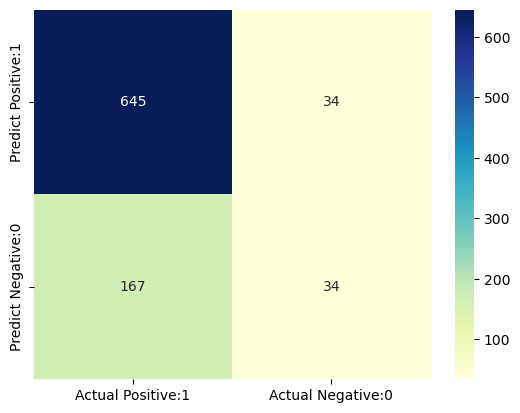

In [79]:
matrix=pd.DataFrame(data=data_table,columns=['Actual Positive:1','Actual Negative:0'],
                                            index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(matrix,annot=True,fmt='d',cmap='YlGnBu')

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.87       679
           1       0.50      0.17      0.25       201

    accuracy                           0.77       880
   macro avg       0.65      0.56      0.56       880
weighted avg       0.73      0.77      0.73       880



In [81]:
from sklearn.metrics import accuracy_score
print("Model accuracy score:{0:0.4f}".format(accuracy_score(y_train,y_train_pred)))

Model accuracy score:0.7716


# evaluating the model on the test data

In [82]:
y_test_pred=gnb.predict(x_test)
y_test_pred=pd.Series(y_test_pred)
Model_data_test=pd.DataFrame(y_test)
Model_data_test['y_pred']=y_test_pred
Model_data_test

,fraudulent,y_pred
395,1,NaN
860,0,NaN
477,0,NaN
671,0,NaN
1002,0,NaN
...,...,...
640,0,NaN
605,0,NaN
588,0,NaN
561,1,NaN


In [83]:
pd.crosstab(Model_data_test.fraudulent,Model_data_test.y_pred,margins=True)

y_pred,0.0,1.0,All
fraudulent,,,
0,24,1,25
1,6,2,8
All,30,3,33


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       167
           1       0.60      0.23      0.33        53

    accuracy                           0.78       220
   macro avg       0.70      0.59      0.60       220
weighted avg       0.75      0.78      0.74       220



In [85]:
from sklearn.metrics import accuracy_score
print("Model accuracy score: {0:0.4f}".format(accuracy_score(y_test,y_test_pred)))

Model accuracy score: 0.7773


### It is not overfitting model. we have divided the training and testing dataset in 80-20 ratio and we got almost training and testing accuracy